# Introduction

One of the main tenets of contemporary finance theory is mean-variance portfolio theory (MPT). Harry Markowitz, the creator, was granted the 1990 Nobel Prize in Economics based on this theoretical innovation. Despite being developed in the 1950s, this theory is still taught to finance students and used in real-world situations today. Our main goal with MPT is to use the principle of <i>diversification</i> to obtain the least portfolio risk possible given a certain return percentage or to obtain the maximum return possible using a certain risk percentage.

In this project, we have a client who is a technology enthusiast and he would like to invest in tech companies. The client does not want to invest more than 40% of his budget in any single stock. Normally, we would like to ask the client in what companies he would like to invest in. However, considering that our client is fictional, we are going to assume that he wants to invest in the biggest tech companies: Meta, Apple, Amazon, Microsoft, and Tesla. We chose the these stocks because they represent the biggest companies in Technology. Thus, our goal is to apply the principles of Portfolio Optimisation to determine which of the stocks our client should invest in.

## Structure

As per feedback from the lecturer, there is no EDA for this project. Accordingly, this notebook will be divided into the following sections:
<ul>
    <li><b>Importing the libraries:</b> We will import the data science stack and install a few additional libraries that we will need for this project.</li>
    <li><b>Stock data retrieval:</b> We will use <i>pandas_datareader</i> and <i>yfinance</i> to retrieve the stock data of the tech companies.</li>
    <li><b>The Expected Return and Volatility:</b> We will briefly explain the concept of the Expected Return in Portfolio Theory and apply it to our problem. Additionally, we will calculate the Sharpe Ratio and visualise it.</li>
    <li><b>The Optimal Portfolio:</b> Here, our goal is to optimise our portfolio. To do that, we need to maximise the Sharpe Ratio we calculated in the previous step.</li>
    <li><b>The Efficient Frontier:</b> The basic principle is that investors will only invest in a stock if it is on the efficient frontier. We will calculate and visualise the efficient frontier to determine which stocks our client should invest in.</li>
</ul>

# Importing the libraries

We will start by installing 2 important packages:
<ol>
    <li>pandas-datareader</li>
    <li>yfinance</li>
</ol>
We need both of these packages because we will get the stocks data of the tech companies from them.

In [1]:
# Use the pip command to install pandas_datareader and yfinance
!pip install pandas-datareader
!pip install yfinance

Next, we will import the following libraries from the python data science stack:
<ul>
    <li><i>numpy:</i> We will use <i>numpy</i> for all mathematical calculations.</li>
    <li><i>pandas:</i> To be able to interact with the stocks data by putting it into a dataframe.</li>
    <li><i>matplotlib.pyplot:</i> To effectively visualise all the operations we undertake on the dataset.</li>
</ul>

Additionally, we will make use of the packages we just installed and a a core python library:
<ul>
    <li><i>pandas_datareader.data:</i> This will be our main method to get the stocks data of the tech companies.</li>
    <li><i>yfinance:</i> We will only use it to call the <i>pdr_override</i> method to make the data retrieval faster.</li>
    <li><i>datetime:</i> We need it for all operations requiring date and time information.</li>
</ul>

We will import additional libraries should the need arise for them.

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)

# Pyplot will be used for data visualisation
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
pd.plotting.register_matplotlib_converters()
%matplotlib inline

# Stock data libraries
import pandas_datareader.data as wb
import yfinance as yf

# datetime library for date and time operations
from datetime import datetime

# Call the pdr_override method to let yfinance handle the data retrieval so it becomes faster
yf.pdr_override()

# Stock data retrieval

We officially start by importing the stock data using the ticker symbol of each of the tech companies.

In [3]:
# Preliminary data to import the stock information
tech_tickers = ['TSLA', 'AAPL', 'MSFT', 'META', 'AMZN']
start = datetime(2018, 1, 1)
today = datetime(2023,1,1)
#today = datetime.today().strftime('%Y-%m-%d')
noa = len(tech_tickers)

# We will import the Adjusted Closing Prices of the tech companies
df = wb.DataReader(tech_tickers, start=start, end=today)['Close']
df.columns = tech_tickers

# Let's view the first few rows to make sure that everything is alright
df.head()

[*********************100%%**********************]  5 of 5 completed


,TSLA,AAPL,MSFT,META,AMZN
Date,,,,,
2018-01-02,43.064999,59.450500,181.419998,85.949997,21.368668
2018-01-03,43.057499,60.209999,184.669998,86.349998,21.150000
2018-01-04,43.257500,60.479500,184.330002,87.110001,20.974667
2018-01-05,43.750000,61.457001,186.850006,88.190002,21.105333
2018-01-08,43.587502,62.343498,188.279999,88.279999,22.427334


## Visualising the prices and returns

Next, we visualise the data using Matplotlib. We will use two types of plots:
<ol>
    <li>A line plot to visualise the different stocks in a normalised manner.</li>
    <li>Histograms to visualise the logarithmic returns of the stocks.</li>
</ol>

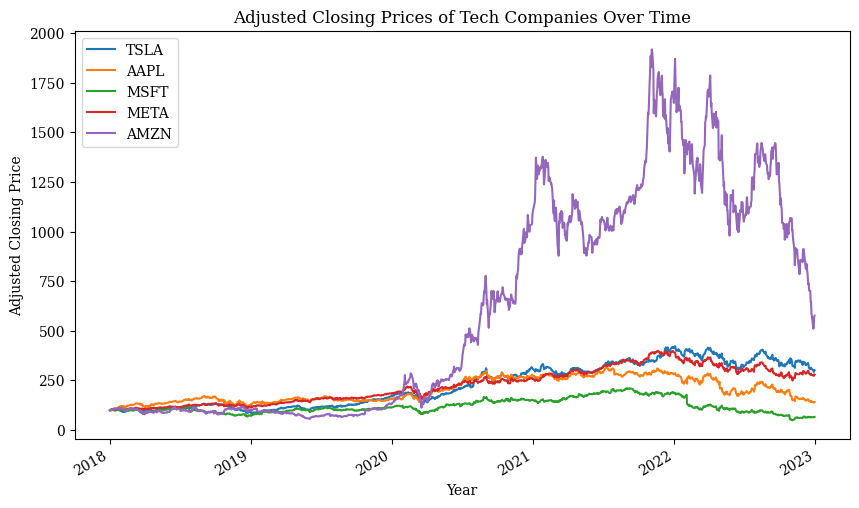

In [4]:
# Normalise the data and plot the line plot
(df / df.iloc[0] * 100).plot(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Prices of Tech Companies Over Time')
plt.show()

The line plot displays the trend of the adjusted closing prices of the different tech companies. Among all the stocks, we see that Amazon experienced the greatest growth starting from the year 2020. All of the companies experienced growth during the 2020 COVID pandemic.

Next, we draw the logarithmic returns of the tech companies in the form of histograms.

Text(0.5, 0.98, 'Logarithmic Returns of Tech Stocks')

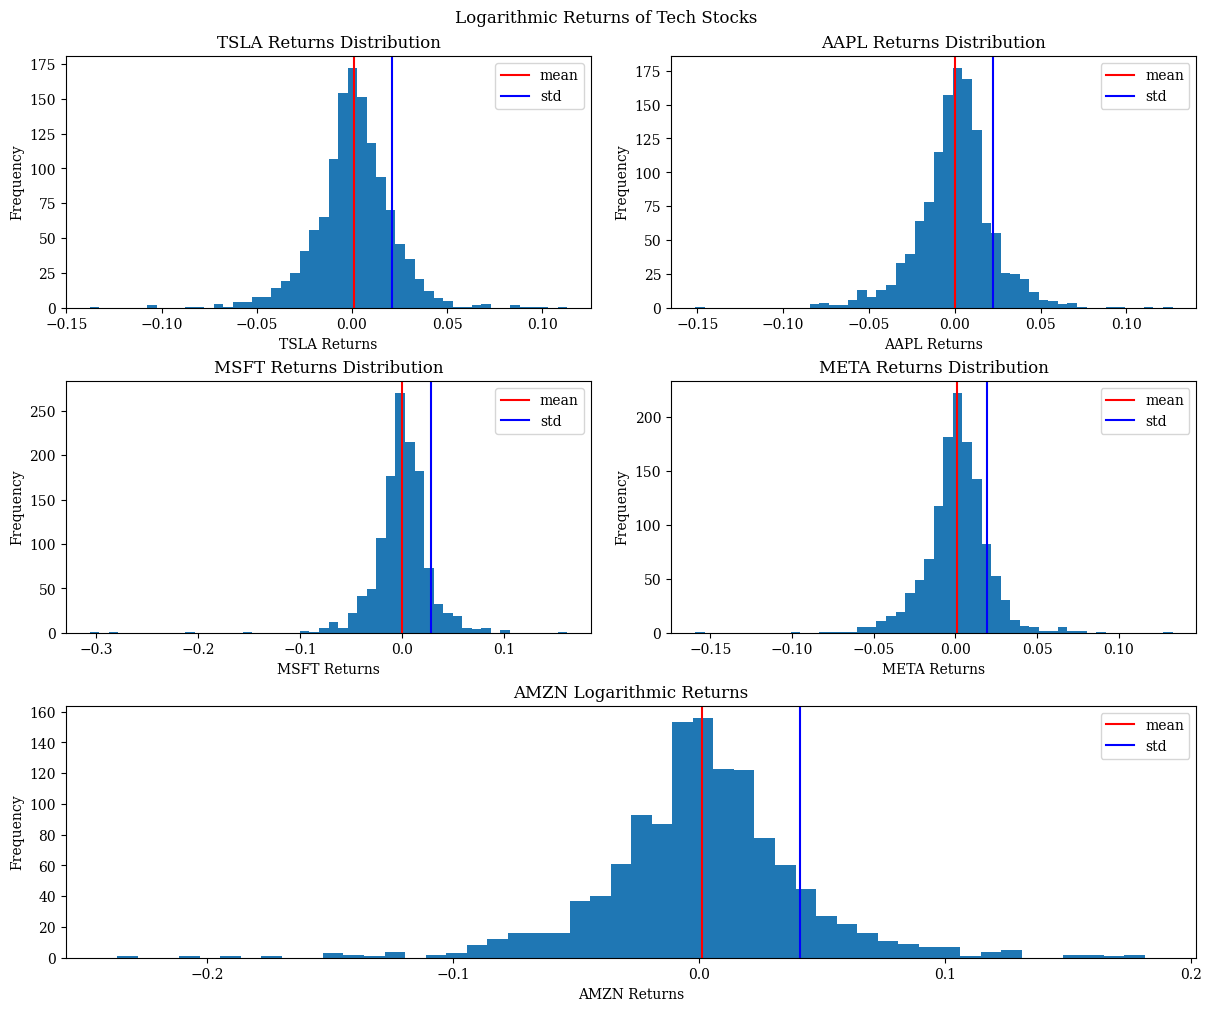

In [5]:
# Get the logarithmic returns of the stocks
rets = np.log(df / df.shift(1))

# Plot them using histograms
# We first define a figure and add a GridSpec to this figure
# It helps to arrange our plots
fig = plt.figure(figsize=(12, 10), layout='constrained')
spec = fig.add_gridspec(3, 2)

# Tesla Logarithmic Returns
ax1 = fig.add_subplot(spec[0, 0])
ax1.hist(x=rets.iloc[:, 0], bins=50)
ax1.axvline(rets.iloc[:, 0].mean(), color='r', linewidth=1.5, label='mean')
ax1.axvline(rets.iloc[:, 0].std(), color='b', linewidth=1.5, label='std')
ax1.legend(loc=0)
ax1.title.set_text(f'{rets.columns[0]} Returns Distribution')
ax1.set_xlabel(f'{rets.columns[0]} Returns')
ax1.set_ylabel('Frequency')

# Apple Logarithmic Returns
ax2 = fig.add_subplot(spec[0, 1])
ax2.hist(x=rets.iloc[:, 1], bins=50)
ax2.axvline(rets.iloc[:, 1].mean(), color='r', linewidth=1.5, label='mean')
ax2.axvline(rets.iloc[:, 1].std(), color='b', linewidth=1.5, label='std')
ax2.legend(loc=0)
ax2.title.set_text(f'{rets.columns[1]} Returns Distribution')
ax2.set_xlabel(f'{rets.columns[1]} Returns')
ax2.set_ylabel('Frequency')

# Microsoft Logarithmic Returns
ax3 = fig.add_subplot(spec[1, 0])
ax3.hist(x=rets.iloc[:, 2], bins=50)
ax3.axvline(rets.iloc[:, 2].mean(), color='r', linewidth=1.5, label='mean')
ax3.axvline(rets.iloc[:, 2].std(), color='b', linewidth=1.5, label='std')
ax3.legend(loc=0)
ax3.title.set_text(f'{rets.columns[2]} Returns Distribution')
ax3.set_xlabel(f'{rets.columns[2]} Returns')
ax3.set_ylabel('Frequency')

# Meta Logarithmic Returns
ax4 = fig.add_subplot(spec[1, 1])
ax4.hist(x=rets.iloc[:, 3], bins=50)
ax4.axvline(rets.iloc[:, 3].mean(), color='r', linewidth=1.5, label='mean')
ax4.axvline(rets.iloc[:, 3].std(), color='b', linewidth=1.5, label='std')
ax4.legend(loc=0)
ax4.title.set_text(f'{rets.columns[3]} Returns Distribution')
ax4.set_xlabel(f'{rets.columns[3]} Returns')
ax4.set_ylabel('Frequency')

# Amazon Logarithmic Returns
ax5 = fig.add_subplot(spec[2, :])
ax5.hist(x=rets.iloc[:, 4], bins=50)
ax5.axvline(rets.iloc[:, 4].mean(), color='r', linewidth=1.5, label='mean')
ax5.axvline(rets.iloc[:, 4].std(), color='b', linewidth=1.5, label='std')
ax5.legend(loc=0)
ax5.title.set_text(f'{rets.columns[4]} Logarithmic Returns')
ax5.set_xlabel(f'{rets.columns[4]} Returns')
ax5.set_ylabel('Frequency')

plt.suptitle("Logarithmic Returns of Tech Stocks")

We see from the histograms that the logarithmic returns of the tech stocks are normally distributed because all of the histogram have the bell-shaped curve typical of a normal distribution. This is good for us because Modern Portfolio Theory works with the assumption that the data is normally distributed.

## Getting the average returns, covariance and correlation matrices

The covariance matrix for the financial instruments to be invested in is the central piece of the portfolio selection process. We use the pandas <i>mean</i> and <i>cov</i> methods on the logarithmic returns and annualise the results to gain an understanding of the average returns over time, and how the returns of the tech stocks relate to each other. We annualise the results by multiplying them by 252, representing the number of trading days per year.

In [6]:
rets.mean() * 252

TSLA    0.221208
AAPL    0.069244
MSFT   -0.082229
META    0.205551
AMZN    0.350901
dtype: float64

Predictably, Amazon has the highest mean returns. We can also see that Microsoft has negative returns.

In [7]:
rets.cov() * 252

,TSLA,AAPL,MSFT,META,AMZN
TSLA,0.112327,0.078453,0.085362,0.080643,0.103918
AAPL,0.078453,0.128335,0.096169,0.079784,0.102469
MSFT,0.085362,0.096169,0.196695,0.084595,0.098043
META,0.080643,0.079784,0.084595,0.096607,0.095419
AMZN,0.103918,0.102469,0.098043,0.095419,0.428383


We see that the covariance matrix shows nothing except positive values. This indicates that all the stocks have the tendency to co-move on the same direction. Therefore, we establish that there is a positive association between all the stocks. We detect that Meta, despite having a high return value, also has low volatility, which is counter-intuitive to this process.

Last but not least, let us check the correlation between the different returns by displaying a correlation matrix. It will help us to establish the strength and magnitude of the relations between the returns.

In [8]:
rets.corr()

,TSLA,AAPL,MSFT,META,AMZN
TSLA,1.000000,0.653422,0.574283,0.774144,0.473731
AAPL,0.653422,1.000000,0.605295,0.716534,0.437021
MSFT,0.574283,0.605295,1.000000,0.613679,0.337756
META,0.774144,0.716534,0.613679,1.000000,0.469045
AMZN,0.473731,0.437021,0.337756,0.469045,1.000000


From the correlation matrix, we deduce that the strongest relation among all the returns is the returns of Meta and Amazon.

In the next phase, we will examine the expected return of the portfolio.

# The Expected Return and Volatility

The client does not want to invest more than 40% of his budget in any single stock. We need to generate 5 random weights for each of the five stocks, and make sure that none of the weights surpass 40%.

In [9]:
# Let's turn this process into a function because we will use it later
def get_weights() -> np.ndarray:
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    while np.all(weights <= 0.4) != True:
        weights = np.random.random(noa)
        weights /= np.sum(weights)
    return weights

weights = get_weights()

print(f"The weights are: {weights.tolist()}")
print(f"The sum of the weights is: {weights.sum()}")
print(f"Are the weights all less than or equal 0.4?\nAnswer: {np.all(weights <= 0.4)}")

The weights are: [0.22824460197626056, 0.11221704441217449, 0.08395589235764508, 0.34849097472780716, 0.22709148652611272]
The sum of the weights is: 1.0
Are the weights all less than or equal 0.4?
Answer: True


Now that we have our weights and average returns, we are able to calculate the expected portfolio return. Given a number of financial instruments $I$, a number of weights $w_1, w_2, ... w_i$ where $\sum \limits _I w_i = 1$, and a number of average returns $\mu_1, \mu_2, ... \mu_i$, we calculate the expected return as:

$$
    E[R_p] = \sum \limits _I w_i \mu_i
$$

In [10]:
# We need to turn this into a function
def get_returns(weights) -> float:
    return np.sum(rets.mean() * weights) * 252

print(get_returns(weights=weights))

0.2026756404798366


Notice that we annualised the expected returns by multiplying the result with the number of trading days. 

Now that we calculated the expected return of the portfolio, the second thing we will concern ourselves with is the variance. By calculating the variance, we will then be able to calculate the standard deviation (i.e. the volatility) of the returns.

Given a number of financial instruments $I$, a number of weights $w_1, w_2, ... w_i$, a number of average returns $R_1, R_2, ... R_i$, and the expected portfolio return $R_p$, we calculate the variance as:

$$
    Var[R_p] = \sum \limits _I w_i * Cov(R_i, R_p)
$$

From there, we calculate the standard deviation of the portfolio as:

$$
    SD[R_p] = \sqrt{Var[R_p]}
$$

In [11]:
# Again, we will turn this into a function
# We use weights.T to get the transpose of the weights matrix
def get_volatility(weights) -> float:
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

print(get_volatility(weights=weights))

0.33262081098841184


Why are interested in calculating the expected return and the volatility of the average returns? There are three reasons:

<ol>
    <li>It gives an idea of the relationship between the risk and return.</li>
    <li>It allows to calculate the Sharpe Ratio, which is the ratio of the excess return to the excess risk.</li>
    <li>Most importantly, we can a generate a range of risk and return profiles for a set of financial instruments (in this case, the tech stocks).</li>
</ol>

To accomplish the third and most important point, we employ Monte Carlo Simulation.

In [12]:
# Instantiate one new list for the returns and one for the volatilities
prets = []
pvols = []

# We choose a range of 2500 values. This number is completely arbitrary
for p in range(2500):
    weights = get_weights()
    prets.append(get_returns(weights=weights))
    pvols.append(get_volatility(weights=weights))
    
prets = np.array(prets)
pvols = np.array(pvols)

Now that we have a range of returns and a range of volatilities, we will proceed with calculating the Sharpe ratio. Given the expected return of a portfolio $E[R_p]$, a risk-free rate of return $r_f$, and the standard deviation of a portfolio $SD[R_p]$, we calculate the Sharpe Ratio as:

$$
    Sharpe Ratio = \frac {E[R_p] - r_f}{SD[R_p]}
$$

Since our portfolio does not contain any risk-free assets like Bonds or Treasury Bills, we will assume that the risk free rate equals 0%.

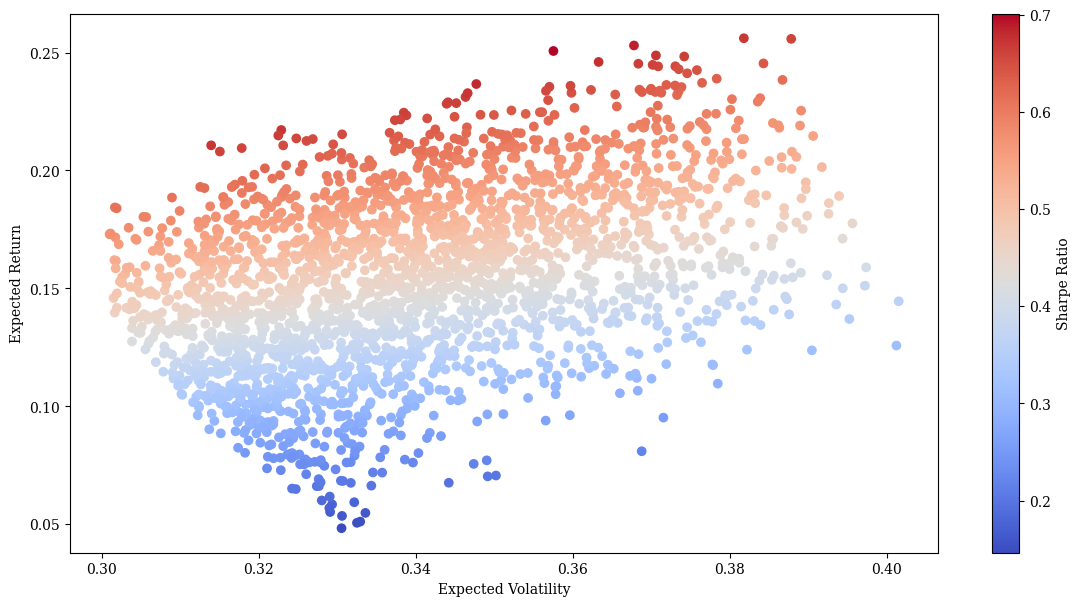

In [13]:
# Calculate the Sharpe Ratio
sharpe_ratio = prets/pvols

# Visualise the expected returns and risks with the Sharpe Ratio using a scatterplot
plt.figure(figsize=(14, 7))
plt.scatter(pvols, prets, c=sharpe_ratio, marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

The graph displays the expected returns and volatilities of our 5 tech companies given different weights (with each weight not surpassing 40%). This graph will act as a base for our next actions, which include optimising the portfolio and determining the efficient frontier.

# The Optimal Portfolio

Having calculated the Sharpe Ratio, it is now possible for us to optimise the portfolio such that we select only the most attractive investments. To do that, we need to maximise the Sharpe Ratio to get a set of the best investments with the highest return given a certain level of risk.

To begin, we will import the <i>minimize</i> method from the <i>scipy.optimize</i> module. Although it sounds counter-intuitive to use the <i>minimize</i> method because we want to maximise the Sharpe Ratio, we can use the <i>minimize</i> method on the negative value of the Sharpe Ratio to maximise it.

In [14]:
# Import the necessary method
import scipy.optimize as sco

# We define the function to be minimised
def min_func_sharpe(weights):
    return -(get_returns(weights=weights)) / get_volatility(weights=weights)

# Define the equality constraint (All weights must sum up to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
print(f"Constraints: {constraints}")

# Define the boundaries for the parameters (All the weight values must be between 0 and 0.4)
bounds = tuple((0, 0.4) for x in range(noa))
print(f"Bounds: {bounds}")

# The equal weights vector (Assume an equal distribution of weights)
eweights = noa * [1. / noa,]
print(f"Equal Weights Vector: {eweights}")

Constraints: {'type': 'eq', 'fun': <function <lambda> at 0x7f3ce880bc40>}
Bounds: ((0, 0.4), (0, 0.4), (0, 0.4), (0, 0.4), (0, 0.4))
Equal Weights Vector: [0.2, 0.2, 0.2, 0.2, 0.2]


Now that we have all the values we need, we can proceed with maximising the Sharpe Ratio.

In [15]:
# Use the Sequential Least Squares Programming (SLSQP) method for the minimisation
optimal_portfolio = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bounds, constraints=constraints)

optimal_portfolio

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.732090860205977
       x: [ 4.000e-01  0.000e+00  1.023e-16  4.000e-01  2.000e-01]
     nit: 4
     jac: [-9.804e-03  3.561e-01  8.422e-01 -1.623e-02  5.207e-02]
    nfev: 24
    njev: 4

Our second concern before moving on is to identify the portfolio with the minimum volatility. We do that by calling the <i>minimize</i> again. However, we will pass in the <i>get_volatility</i> function to get the minimised volatilities.

In [16]:
# Minimise the portfolio variance
def min_func_variance(weights):
    return get_volatility(weights=weights) ** 2

optimal_variance = sco.minimize(min_func_variance, eweights, method='SLSQP', bounds=bounds, constraints=constraints)

optimal_variance

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.08939188803548603
       x: [ 3.379e-01  2.295e-01  3.253e-02  4.000e-01  1.197e-17]
     nit: 10
     jac: [ 1.820e-01  1.820e-01  1.823e-01  1.739e-01  2.000e-01]
    nfev: 60
    njev: 10

# The Efficient Frontier

Having maximised the Sharpe Ratio, we can now use it to draw the Efficient Frontier. The Efficient Frontier is a set of investment portfolios that display the highest returns given a certain level of risk.

In [17]:
# We will add an additional constraint (Our Returns should equal the target return)
constraints = ({'type': 'eq', 'fun': lambda x: get_returns(x) - tret},
              {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Our target retuns will be represented as a list of uniformly distributed weights
trets = np.linspace(0.0, 0.25, 50)

# Define the target volatilities list
tvols = []

# Get the target volatilities using scipy.optimize.minimize
for tret in trets:
    res = sco.minimize(get_volatility, eweights, method='SLSQP', bounds=bounds, constraints=constraints)
    tvols.append(res['fun'])

tvols = np.array(tvols)
tvols

array([0.33607086, 0.33607086, 0.33607086, 0.33607086, 0.33607086,
       0.33607086, 0.33607086, 0.33607086, 0.33359341, 0.33111724,
       0.32873051, 0.3264352 , 0.32422877, 0.32210202, 0.32005618,
       0.31809279, 0.31621338, 0.31441947, 0.31271252, 0.31109395,
       0.30956513, 0.30812697, 0.30678153, 0.30552979, 0.30437266,
       0.30331171, 0.30235113, 0.30150824, 0.3007853 , 0.30018319,
       0.29970261, 0.29934419, 0.29910831, 0.29899523, 0.29900529,
       0.29914031, 0.29940584, 0.30017213, 0.30136027, 0.30292502,
       0.30486061, 0.30716001, 0.30981513, 0.3128169 , 0.31615546,
       0.31982026, 0.32380022, 0.32808387, 0.33568632, 0.34502192])

We now have everything we need to plot the Efficient Frontier.

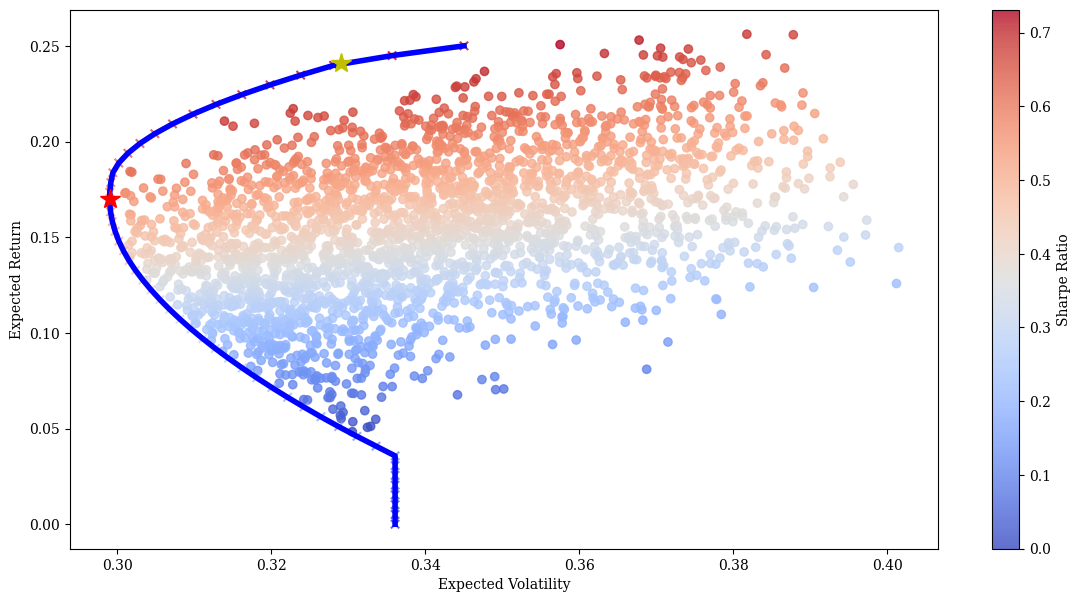

In [18]:
# Calculate both types of Sharpe Ratio
random_portfolio_sharpe_ratio = prets/pvols
target_portfolio_sharpe_ratio = trets/tvols

# Random Portfolio Profiles Composition
plt.figure(figsize=(14, 7))
plt.scatter(pvols, prets, c=random_portfolio_sharpe_ratio, marker='o', alpha=0.8, cmap='coolwarm')

# Optimal Portfolio Profiles Composition (The Efficient Frontier)
plt.scatter(tvols, trets, c=target_portfolio_sharpe_ratio, marker='x', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)

# The Optimal (or Efficient) Portfolio (Portfolio With Maximum Sharpe Ratio)
plt.plot(get_volatility(optimal_portfolio['x']), get_returns(optimal_portfolio['x']), 'y*', markersize=15.0)

# The Minimum Variance Portfolio
plt.plot(get_volatility(optimal_variance['x']), get_returns(optimal_variance['x']), 'r*', markersize=15.0)

# Minimum Variance Portfolio
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

We have drawn the efficient frontier on the graph we created earlier and identified the optimal portfolio and the minimum variance portfolio on the graph. Find below the weights, return, and volatility of the optimal portfolio.

In [19]:
# Optimal Weights
optimal_weights = pd.DataFrame(data={'Weights': optimal_portfolio['x'].round(3)}, index=tech_tickers)
optimal_weights = optimal_weights.T

optimal_weights

,TSLA,AAPL,MSFT,META,AMZN
Weights,0.4,0.0,0.0,0.4,0.2


In [20]:
# Optimal Return and Volatility
optimal_returns_and_volatilities = pd.DataFrame(data={'Optimal Return': get_returns(optimal_portfolio['x'].round(3)), 
                                                      'Optimal Volatility': get_volatility(optimal_portfolio['x'].round(3))},
                                               index=[0])
optimal_returns_and_volatilities = optimal_returns_and_volatilities.style.hide()
optimal_returns_and_volatilities

Optimal Return,Optimal Volatility
0.240884,0.329035
